# <a id="start">Описание проекта</a>

Нужно принять решение об открытии небольшого кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. 
Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли проект
снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Необходимо подготовить исследование рынка. Есть открытые данные о заведениях общественного питания в Москве.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Оглавление

1. [Загрузка и подготовка исходных данных](#loading)
2. [Анализ данных](#analysis)
    * [2.1. Исследование соотношения видов объектов общественного питания по количеству](#analysis_21)
    * [2.2. Исследование соотношения сетевых и несетевых заведений по количеству](#analysis_22)
    * [2.3. Для какого вида объекта общественного питания характерно сетевое распространение](#analysis_23)
    * [2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест](#analysis_24)
    * [2.5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#analysis_25)
    * [2.6. Выделите в отдельный столбец информацию об улице из столбца address](#analysis_26)
    * [2.7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#analysis_27)
    * [2.8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#analysis_28)
    * [2.9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#analysis_29)
3. [Общие выводы и рекомендации](#results)
4. [Ссылка на презентацию](#link)

## <a id="loading"> 1. Загрузка и подготовка исходных данных </a>

In [2]:
rests = pd.read_csv('/datasets/rest_data.csv')
rests

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


### Описание данных

Таблица rests:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

In [3]:
# Посмотрим подробную информацию о таблице
rests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
# Проверим таблицу на наличие дубликатов
rests.duplicated().sum()

0

In [5]:
rests['object_name'].value_counts().head(50)

Столовая                                267
Кафе                                    236
Шаурма                                  234
KFC                                     155
Шоколадница                             142
Макдоналдс                              122
Бургер Кинг                             122
Домино'с Пицца                           86
Теремок                                  84
Крошка Картошка                          82
Пекарня                                  76
Милти                                    65
Суши Wok                                 61
Буфет                                    59
СТОЛОВАЯ                                 52
Папа Джонс                               50
Кофе с собой                             44
Школьно-базовая столовая                 44
Чайхона №1                               42
КАФЕ                                     41
Выпечка                                  36
Хинкальная                               35
Кафетерий                       

В названиях заведений есть "косяки": написание одной и той же сети кирилицей и латиницей, строчные и заглавные буквы, добавление слова "кафе" в названии и пр. Можно было бы заморочиться и все это почистить, но в общей массе их не так много, для поиска решений на поставленные вопросы они не повлияют. Остальные поля заполнены корректно, и что самое главное - полных дубликатов нет.

In [6]:
# Переведем некоторые столбцы в тип данных категория для оптимизации
rests[['chain', 'object_type']] = rests[['chain', 'object_type']].astype('category')

In [7]:
# Проверим еще раз информацию о таблице
rests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           15366 non-null  int64   
 1   object_name  15366 non-null  object  
 2   chain        15366 non-null  category
 3   object_type  15366 non-null  category
 4   address      15366 non-null  object  
 5   number       15366 non-null  int64   
dtypes: category(2), int64(2), object(2)
memory usage: 510.8+ KB


Данные загружены, в таблице rests 15366 записей, пропущенных и нулевых значений, а также дубликатов не обнаружено.
Столбцы chain и object_type, содержащие категориальные значения переведены в тип данных категория для оптимизации памяти.

На первый взгляд, данные нормальные, годятся для анализа, возможно по ходу анализа понадобится дополнительная обработка.

## <a id="analysis"> 2. Анализ данных</a>

### <a id="analysis_21">2.1. Исследование соотношения видов объектов общественного питания по количеству.</a>

In [8]:
rest_types = rests['object_type'].value_counts(ascending = False)
rest_types

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [9]:
rest_types = pd.DataFrame(rest_types).reset_index()
rest_types.columns = ['object_type', 'quantity']
rest_types

,object_type,quantity
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


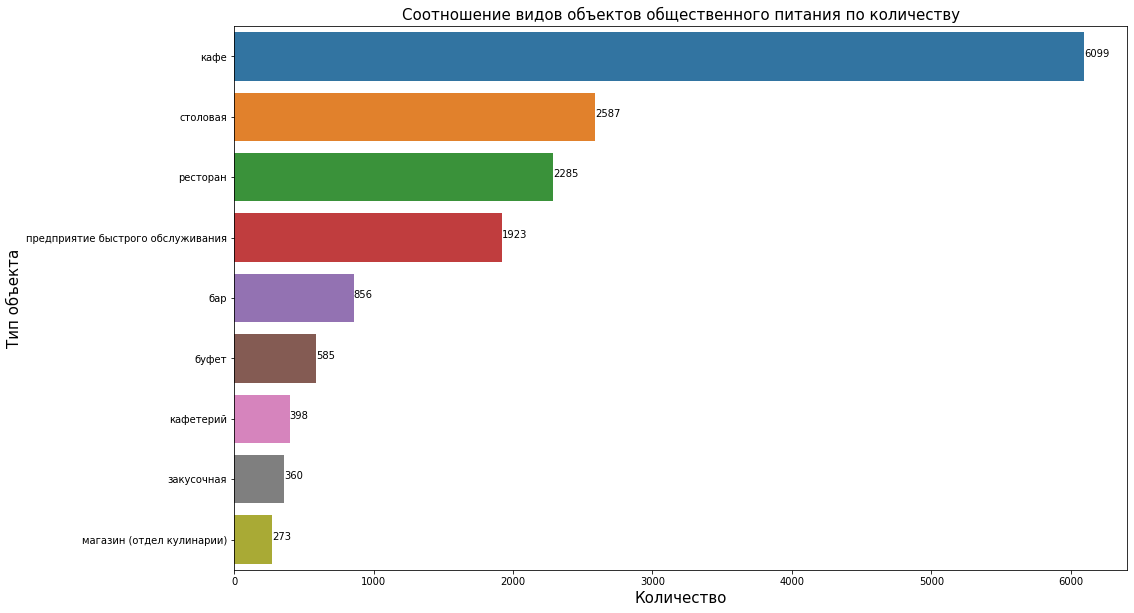

In [10]:
# Построим сравнительный график кол-ва объектов
plt.figure(figsize = (16,10))
ax  = sns.barplot(
    x = 'quantity', 
    y = 'object_type', 
    data = rest_types, 
    order = rest_types.sort_values('quantity', ascending = False).object_type)
plt.title('Соотношение видов объектов общественного питания по количеству', size = 15)
plt.xlabel('Количество', size = 15)
plt.ylabel('Тип объекта', size = 15)

# Добавим подписи данных
for p in ax.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(value, (x, y))


#plt.savefig('plot_1.png', dpi = 100)
plt.show()

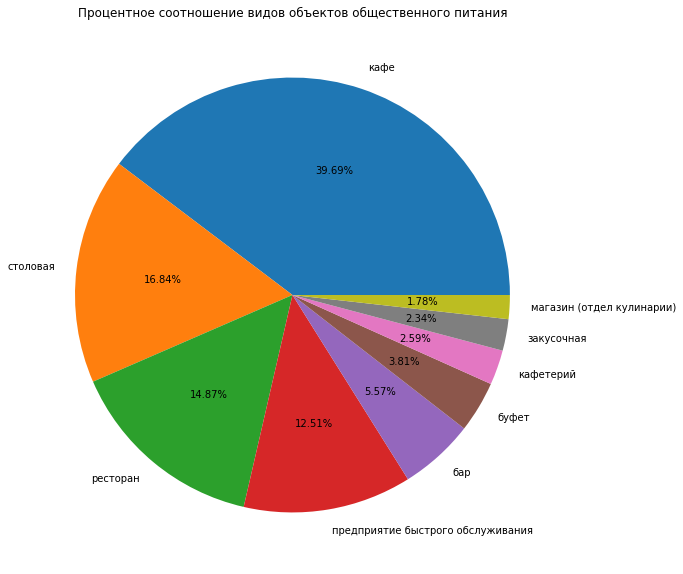

In [11]:
# Построим pie chart кол-ва объектов
plt.figure(figsize = (16,10))

labels = rest_types['object_type']
plt.pie(rest_types['quantity'], labels = labels, autopct = '%.2f%%')
plt.title('Процентное соотношение видов объектов общественного питания')
#plt.savefig('plot_2.png', dpi = 100)
plt.show()

Наиболее популярными являются следующие типы объектов общественного питания:

- кафе (6099 / 39.69%)
- столовая (2587 / 16.84%)
- ресторан (2285 / 14.87%)
- предприятие быстрого обслуживания (1923 / 12.51%)

В сумме эти четыре категории занимают около 84% рынка объектов общественного питания.

С большим отрывом (более чем в 2 раза) лидирует кафе, затем плотной группой идут остальные три популярные категории: столовая, ресторан, предприятие быстрого обслуживания.

### <a id="analysis_22">2.2. Исследование соотношения сетевых и несетевых заведений по количеству.</a>

In [12]:
rest_chain = rests['chain'].value_counts().reset_index()
rest_chain.columns = ['chain', 'count']
rest_chain

,chain,count
0,нет,12398
1,да,2968


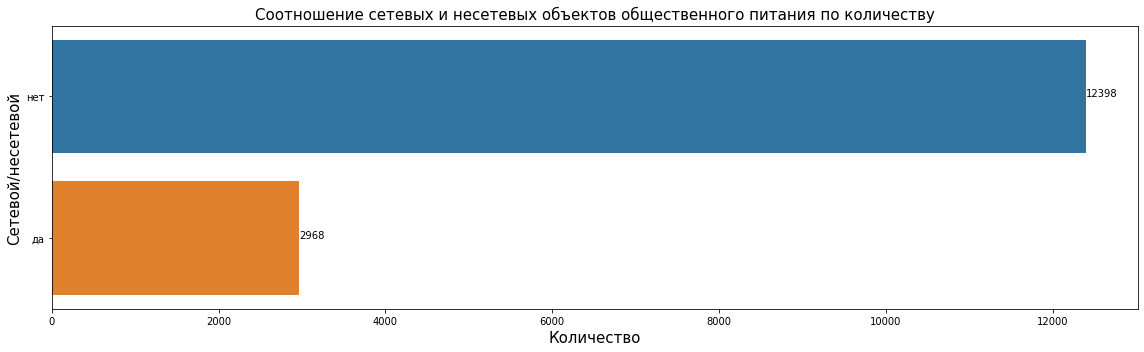

In [13]:
# Построим сравнительный график кол-ва сетевых и несетевых объектов
plt.figure(figsize = (16,5))
ax  = sns.barplot(
    x = 'count', 
    y = 'chain', 
    data = rest_chain, 
    order = rest_chain.sort_values('count', ascending = False).chain)
plt.title('Соотношение сетевых и несетевых объектов общественного питания по количеству', size = 15)
plt.xlabel('Количество', size = 15)
plt.ylabel('Сетевой/несетевой', size = 15)
plt.tight_layout()

# Добавим подписи данных
for p in ax.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(value, (x, y))


#plt.savefig('plot_3.png', dpi = 100)
plt.show()

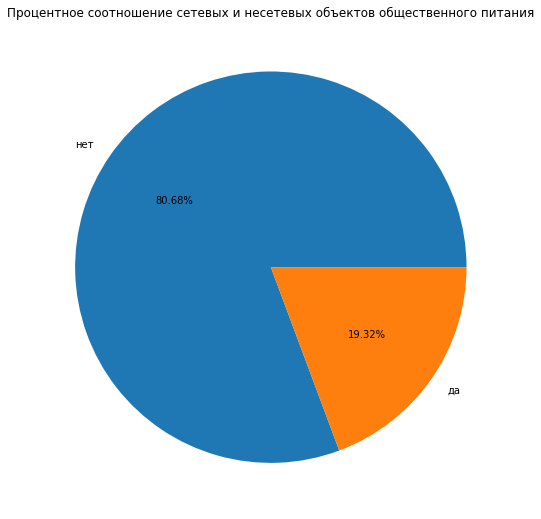

In [14]:
# Построим pie chart соотношения сетевых и несетевых объектов
plt.figure(figsize = (9,9))
labels = rest_chain['chain']
plt.pie(rest_chain['count'], labels = labels, autopct = '%.2f%%')
plt.title('Процентное соотношение сетевых и несетевых объектов общественного питания')
#plt.savefig('plot_4.png', dpi = 100)
plt.show()

По нашим данным - подавляющее преимущество несетевых заведений над сетевыми.

- Несетевых: 12398 / 80.68%
- Сетевых: 2968 / 19.32%

### <a id="analysis_23">2.3. Для какого вида объекта общественного питания характерно сетевое распространение?</a>

In [15]:
# Сгруппируем данные по принадлежности сети и по видам заведений
rests_grouped_by_chain = rests.groupby(['chain','object_type'])['object_name'].count().reset_index()
rests_grouped_by_chain.columns = ['chain', 'object_type', 'count']
rests_grouped_by_chain

,chain,object_type,count
0,да,бар,37
1,да,буфет,11
2,да,закусочная,56
3,да,кафе,1396
4,да,кафетерий,52
5,да,магазин (отдел кулинарии),78
6,да,предприятие быстрого обслуживания,791
7,да,ресторан,544
8,да,столовая,3
9,нет,бар,819


In [16]:
# Создадим таблицу с кол-вом сетевых заведений по видам
chain_rests = rests_grouped_by_chain[rests_grouped_by_chain['chain'] == 'да'].sort_values(by = 'count', ascending = False)
chain_rests

,chain,object_type,count
3,да,кафе,1396
6,да,предприятие быстрого обслуживания,791
7,да,ресторан,544
5,да,магазин (отдел кулинарии),78
2,да,закусочная,56
4,да,кафетерий,52
0,да,бар,37
1,да,буфет,11
8,да,столовая,3


In [17]:
# Создадим таблицу с кол-вом несетевых заведений по видам
non_chain_rests = rests_grouped_by_chain[rests_grouped_by_chain['chain'] == 'нет'].sort_values(
    by = 'count', 
    ascending = False)
non_chain_rests

,chain,object_type,count
12,нет,кафе,4703
17,нет,столовая,2584
16,нет,ресторан,1741
15,нет,предприятие быстрого обслуживания,1132
9,нет,бар,819
10,нет,буфет,574
13,нет,кафетерий,346
11,нет,закусочная,304
14,нет,магазин (отдел кулинарии),195


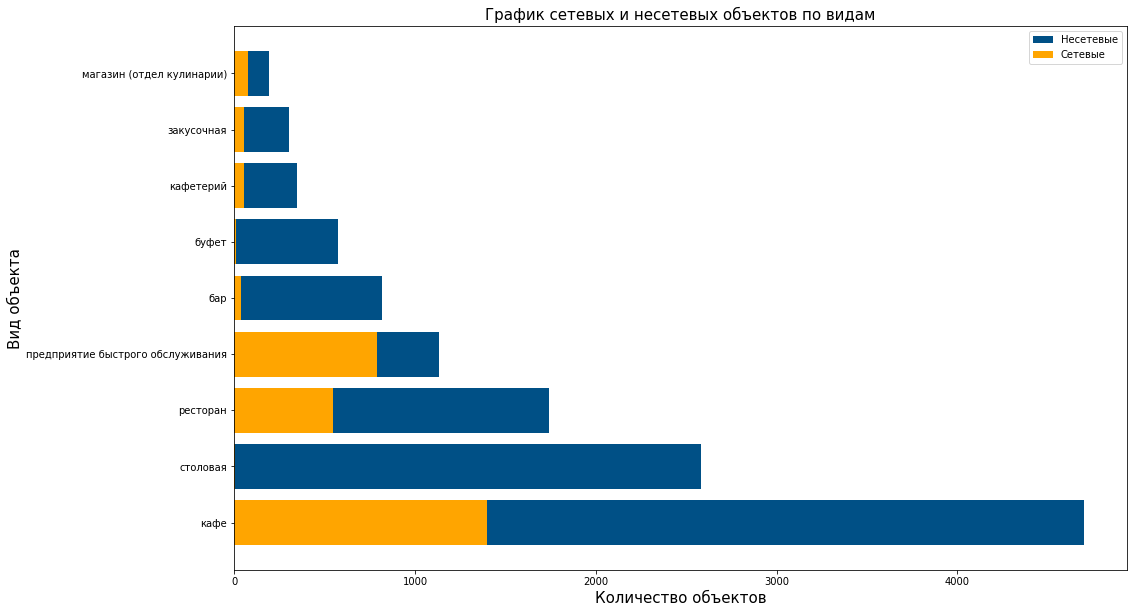

In [18]:
# Построим сводный график сетевых и несетевых заведений по видам
fig, ax = plt.subplots(figsize = (16, 10))

ax.barh(y = non_chain_rests['object_type'], width = non_chain_rests['count'], color='#005086', label='Несетевые')
ax.barh(y = chain_rests['object_type'], width = chain_rests['count'], color='orange', label='Сетевые')
ax.legend()

plt.title('График сетевых и несетевых объектов по видам', size = 15)
plt.xlabel('Количество объектов', size = 15)
plt.ylabel('Вид объекта', size = 15)
#plt.savefig('plot_4_1.png', dpi = 100)
plt.show()

Из графика можно сделать вывод, что сетевое распространение характерно для 3-х видов заведений:
- кафе
- предприятие быстрого обслуживания (фастфуд)
- ресторан

Для остальных видов объектов общественного питания доля сетевых объектов незначительна.

### <a id="analysis_24">2.4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</a>

In [19]:
rests.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [20]:
# Выделим все сетевые заведения в одну таблицу и посчитаем их количество
rests_in_chain = rests[rests['chain'] == 'да'].copy()
rests_in_chain['object_name'].value_counts().head(50)

KFC                                    155
Шоколадница                            141
Бургер Кинг                            122
Макдоналдс                             122
Домино'с Пицца                          86
Теремок                                 84
Крошка Картошка                         82
Милти                                   65
Суши Wok                                61
Папа Джонс                              50
Кофе с собой                            44
Чайхона №1                              42
Хинкальная                              35
Якитория                                33
Кофе Хаус                               31
Додо Пицца                              31
Starbucks                               30
Subway                                  29
МАКДОНАЛДС                              29
Тануки                                  26
Хлеб насущный                           24
Мята Lounge                             23
Иль Патио                               23
Прайм стар 

Видно, что некоторые названия сетевых заведений имеют дубликаты из-за различного написания, например, строчными и заглавными буквами.

In [21]:
# Приведем все названия к нижнему регистру
rests_in_chain['object_name'] = rests_in_chain['object_name'].str.lower()

После данного преобразования, часть дубликатов названий сетевых ресторанов уйдет, часть, однако, останется, например, где в названии сетевого заведения написано слово "кафе".

Также встречается написание названия латинскими буквами, что тоже дает дубликаты в названии сетей.

Считаю что данными дубликатами можно пренебречь из-за малого количества. Мы будем рассматривать только 20 наиболее крупных сетей, для выявления закономерности: "Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?"

In [22]:
# Сгруппируем все сетевые заведения и посчитаем кол-во заведений в каждой сети и среднее кол-во посадочных мест
grouped_rests_in_chain = rests_in_chain.groupby('object_name').agg({'number':'mean', 'id':'count'})\
.sort_values(by = 'id', ascending = False)\
.reset_index()
top_20_chains = grouped_rests_in_chain.head(20).copy()

In [23]:
# Поменяем названия колонок и оптимизируем тип данных
top_20_chains.columns = ['chain_name', 'mean_seats', 'count']
top_20_chains['mean_seats'] = top_20_chains['mean_seats'].astype('int')
top_20_chains

,chain_name,mean_seats,count
0,шоколадница,57,157
1,kfc,55,155
2,макдоналдс,87,151
3,бургер кинг,46,137
4,теремок,25,94
5,крошка картошка,21,90
6,домино'с пицца,18,90
7,милти,1,72
8,суши wok,6,72
9,папа джонс,22,51


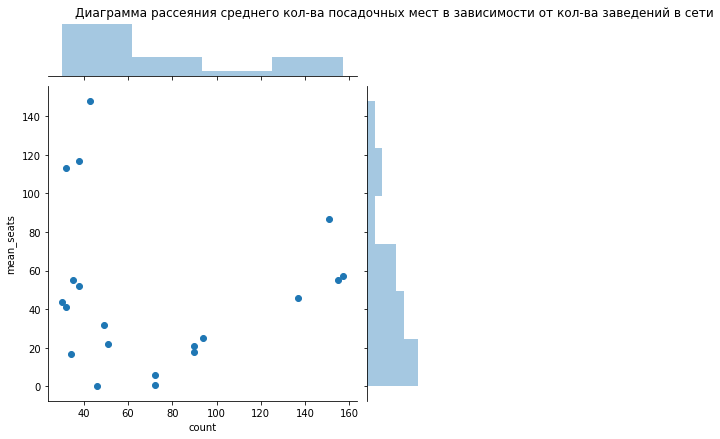

In [24]:
# Построим диаграмму рассеяния
sns.jointplot(x = 'count', y = 'mean_seats', data = top_20_chains)

plt.title('Диаграмма рассеяния среднего кол-ва посадочных мест в зависимости от кол-ва заведений в сети',
          pad = 70)

plt.show()

In [25]:
# Посмотрим коэффициент корреляции Пирсона
top_20_chains['count'].corr(top_20_chains['mean_seats'])

-0.048893330739726425

Однозначно ответить на вопрос "что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?" я не могу.

Разброс большой, какой-то закономерности или связи между количеством заведений и средним количеством посадочных мест я не выявил, что подтверждает и диаграмма рассеяния и коэффициент корреляции Пирсона.

В топ-20 по количеству сетевых заведений есть и с большим кол-вом посадочных мест (больше 100), есть средние (от 40 до 100) и есть даже с 0 количеством посадочных мест - кофейни на вынос.

### <a id="analysis_25">2.5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?</a>

In [26]:
rests.head(3)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95


In [27]:
# Сгруппируем заведения по тимам и посчитаем среднее кол-во мест
type_rests = rests.groupby('object_type')['number'].mean().astype('int').sort_values(ascending = False)
type_rests

object_type
столовая                             130
ресторан                              96
буфет                                 51
бар                                   43
кафе                                  39
предприятие быстрого обслуживания     20
кафетерий                              9
закусочная                             7
магазин (отдел кулинарии)              5
Name: number, dtype: int32

In [28]:
# Для удобства переведем объект Series в DataFrame
type_rests = type_rests.to_frame().reset_index()
type_rests.columns = ['object_type', 'mean_seats']
type_rests

,object_type,mean_seats
0,столовая,130
1,ресторан,96
2,буфет,51
3,бар,43
4,кафе,39
5,предприятие быстрого обслуживания,20
6,кафетерий,9
7,закусочная,7
8,магазин (отдел кулинарии),5


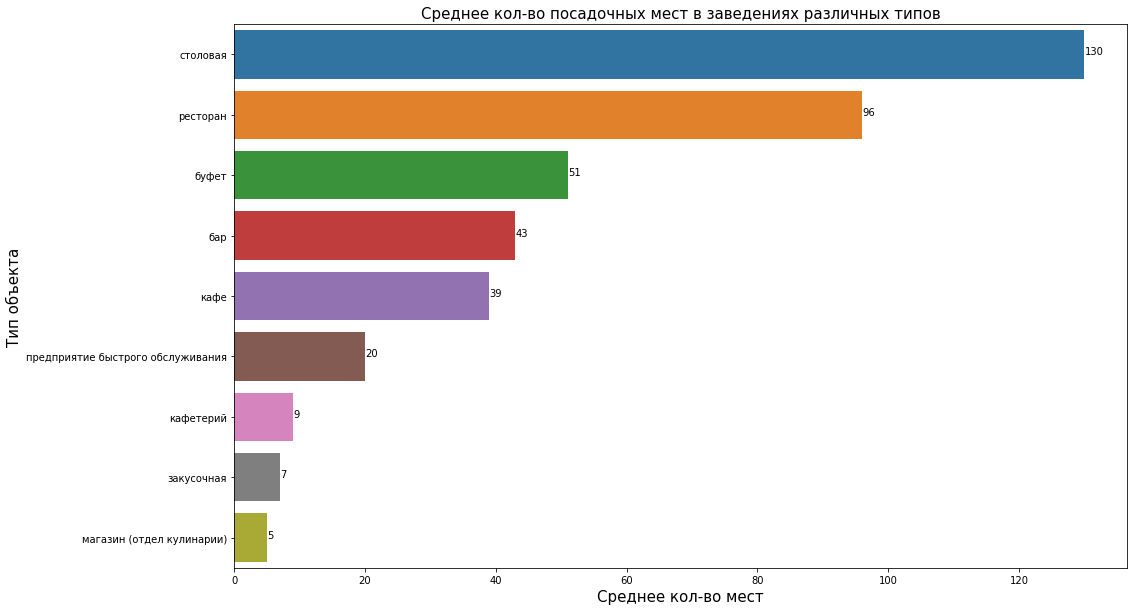

In [29]:
# Построим сравнительный график среднего кол-ва посадочных мест
plt.figure(figsize = (16,10))
ax  = sns.barplot(
    x = 'mean_seats', 
    y = 'object_type', 
    data = type_rests, 
    order = type_rests.sort_values('mean_seats', ascending = False).object_type)

plt.title('Среднее кол-во посадочных мест в заведениях различных типов', size = 15)
plt.xlabel('Среднее кол-во мест', size = 15)
plt.ylabel('Тип объекта', size = 15)

# Добавим подписи данных
for p in ax.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(value, (x, y))


#plt.savefig('plot_6.png', dpi = 100)
plt.show()

Самое большое количество посадочных мест предоставляют столовые (в среднем 130 мест), на втором месте рестораны (в среднем 96 мест).

### <a id="analysis_26">2.6. Выделите в отдельный столбец информацию об улице из столбца address</a>

In [30]:
# Поделим столбец с адресом на составные части
streets = rests['address'].str.split(',', expand = True)
streets

,0,1,2,3,4,5,6
0,город Москва,улица Егора Абакумова,дом 9,None,None,None,None
1,город Москва,улица Талалихина,дом 2/1,корпус 1,None,None,None
2,город Москва,Абельмановская улица,дом 6,None,None,None,None
3,город Москва,Абрамцевская улица,дом 1,None,None,None,None
4,город Москва,Абрамцевская улица,дом 9,корпус 1,None,None,None
...,...,...,...,...,...,...,...
15361,город Москва,3-й Крутицкий переулок,дом 18,None,None,None,None
15362,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15363,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15364,город Москва,поселение Московский,Киевское шоссе,22-й километр,домовладение 4,строение 1,None


### <a id="analysis_27">2.7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?</a>

In [31]:
# Удалим ненужные колонки и переименуем оставшуюся
streets = streets.drop([0, 2, 3, 4, 5, 6], axis = 1)
streets.columns = ['street']
streets

,street
0,улица Егора Абакумова
1,улица Талалихина
2,Абельмановская улица
3,Абрамцевская улица
4,Абрамцевская улица
...,...
15361,3-й Крутицкий переулок
15362,улица Земляной Вал
15363,улица Земляной Вал
15364,поселение Московский


In [32]:
# Посчитаем количество объектов на каждой улице
street_counts = streets['street'].value_counts().to_frame().reset_index()
street_counts.head(20)

,index,street
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
7,поселение Сосенское,138
8,проспект Вернадского,132
9,Кутузовский проспект,114


In [33]:
# В список попали и населенные пункты, удалим их
good_street_counts = street_counts.drop([0, 7])
top_streets = good_street_counts.head(10)
top_streets.columns = ['street', 'count']
top_streets

,street,count
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
5,Варшавское шоссе,161
6,Ленинский проспект,147
8,проспект Вернадского,132
9,Кутузовский проспект,114
10,Каширское шоссе,112
11,Кировоградская улица,110


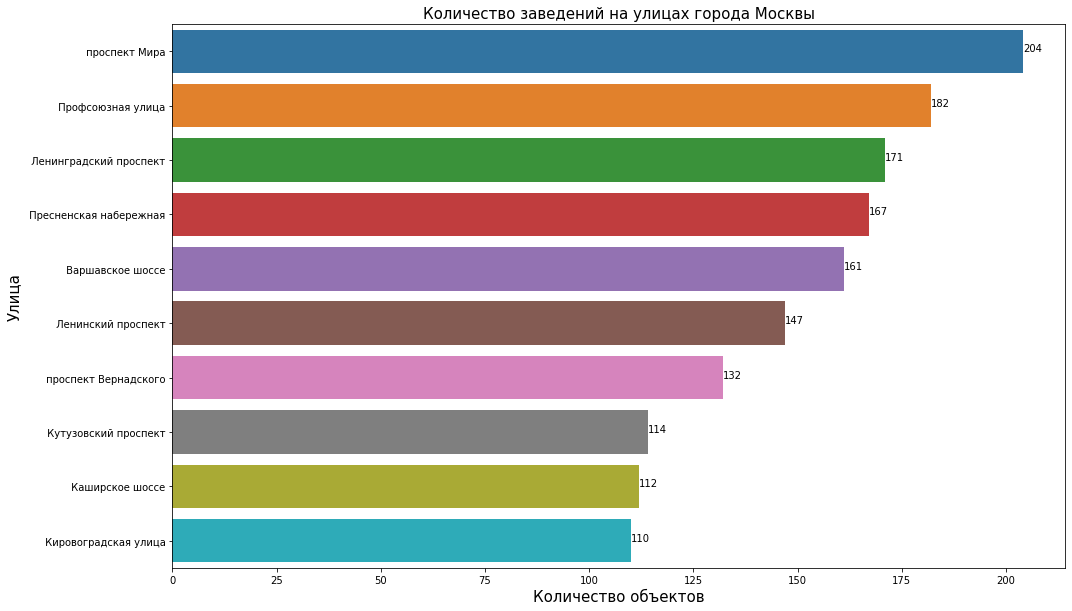

In [34]:
# Построим график количества заведений на улицах города Москвы
plt.figure(figsize = (16,10))
ax  = sns.barplot(
    x = 'count', 
    y = 'street', 
    data = top_streets, 
    order = top_streets.sort_values('count', ascending = False).street)

plt.title('Количество заведений на улицах города Москвы', size = 15)
plt.xlabel('Количество объектов', size = 15)
plt.ylabel('Улица', size = 15)

# Добавим подписи данных
for p in ax.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(value, (x, y))


#plt.savefig('plot_7.png', dpi = 100)
plt.show()

Сразу что бросается в глаза, что большинство улиц в данном списке - это протяженные улицы, из-за этого и количество заведений на них большое. Данные улицы пересекают практически всю Москву и захватывают много районов.

Правильнее было бы определять плотность - количество заведений на километр улицы. По данному показателю лидировали бы другие улицы, находящиеся в центре города, например район Патриарших прудов.

Кировоградская улица. Большое количество заведений там я предполагаю из-за наличия на ней двух транспортных хабов: станций метро Южная и Пражская и наличия возле них крупных торговых центров. Пресненская набережная находится в центре, рядом с рекой и популярными пешеходными маршрутами, также рядом много офисных зданий.

Также можно отметить, что большинство улиц с большим кол-вом объектов находятся в юго-западной части города, как наиболее его благоприятной для жизни части.

Я воспользовался порталом открытых данных города Москвы, нашел датасет отключения горячей воды, из которого можно вытащить данные по принадлежности улиц к округам и районам.

<a id="link">Ссылка на датасет:</a> <https://yadi.sk/d/xJwtxSLQDDj5Gg>

In [35]:
#https://op.mos.ru/EHDWSREST/catalog/export/get?id=900243
file = 'data-100797-2020-08-05.xlsx'
open_streets = pd.read_excel(file)
open_streets.head()

,global_id,AdmArea,District,Address,AddressClarification,BuildingType,OutageBySections,Periods,UserNumber,UNOM
0,864658370,Центральный административный округ,район Хамовники,"город Москва, Большой Афанасьевский переулок, ...",NaN,жилой дом,нет,Подъезды: все подъезды\nДата отключения ГВС: б...,NaN,15415
1,864810968,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40, корп...",NaN,жилой дом,нет,Подъезды: все подъезды\nДата отключения ГВС: б...,NaN,4734
2,864810969,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40А",NaN,жилой дом,нет,Подъезды: все подъезды\nДата отключения ГВС: б...,NaN,4736
3,864810970,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40, корп...",NaN,жилой дом,нет,Подъезды: все подъезды\nДата отключения ГВС: б...,NaN,80053
4,864810988,Юго-Восточный административный округ,район Люблино,"город Москва, Иловайская улица, дом 12, строен...",NaN,жилой дом,нет,Подъезды: все подъезды\nДата отключения ГВС: б...,NaN,8790


In [36]:
open_streets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70520 entries, 0 to 70519
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   global_id             70520 non-null  int64 
 1   AdmArea               70520 non-null  object
 2   District              70520 non-null  object
 3   Address               70520 non-null  object
 4   AddressClarification  485 non-null    object
 5   BuildingType          70520 non-null  object
 6   OutageBySections      70520 non-null  object
 7   Periods               70520 non-null  object
 8   UserNumber            67421 non-null  object
 9   UNOM                  70520 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 5.4+ MB


In [37]:
# Удалим лишние колонки
good_open_streets = open_streets.drop(
    ['global_id', 'AddressClarification', 'BuildingType', 'OutageBySections', 'Periods', 'UserNumber', 'UNOM'], 
             axis = 1
)
good_open_streets.head(3)

,AdmArea,District,Address
0,Центральный административный округ,район Хамовники,"город Москва, Большой Афанасьевский переулок, ..."
1,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40, корп..."
2,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40А"


In [38]:
# Разделим колонку с адресом на составляющие
good_open_streets.columns = ['adm_area', 'district', 'address']
split_open_streets = good_open_streets['address'].str.split(',', expand = True)
split_open_streets.head(3)

,0,1,2,3,4,5
0,город Москва,Большой Афанасьевский переулок,дом 7,строение 3,None,None
1,город Москва,Волочаевская улица,дом 40,корпус 9,None,None
2,город Москва,Волочаевская улица,дом 40А,None,None,None


In [39]:
# Соединим таблицу нашего датасета с внешними данными
good_open_streets = good_open_streets.join(split_open_streets)
good_open_streets.head()

,adm_area,district,address,0,1,2,3,4,5
0,Центральный административный округ,район Хамовники,"город Москва, Большой Афанасьевский переулок, ...",город Москва,Большой Афанасьевский переулок,дом 7,строение 3,None,None
1,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40, корп...",город Москва,Волочаевская улица,дом 40,корпус 9,None,None
2,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40А",город Москва,Волочаевская улица,дом 40А,None,None,None
3,Юго-Восточный административный округ,район Лефортово,"город Москва, Волочаевская улица, дом 40, корп...",город Москва,Волочаевская улица,дом 40,корпус 2,None,None
4,Юго-Восточный административный округ,район Люблино,"город Москва, Иловайская улица, дом 12, строен...",город Москва,Иловайская улица,дом 12,строение 1,None,None


In [40]:
# Удалим лишние колонки и переименуем оставшиеся
good_open_streets = good_open_streets.drop([2, 3, 4, 5, 'address'], axis = 1)
good_open_streets.columns = ['adm_area', 'district', 'city', 'street']
good_open_streets.head(3)

,adm_area,district,city,street
0,Центральный административный округ,район Хамовники,город Москва,Большой Афанасьевский переулок
1,Юго-Восточный административный округ,район Лефортово,город Москва,Волочаевская улица
2,Юго-Восточный административный округ,район Лефортово,город Москва,Волочаевская улица


In [41]:
# Сгруппируем таблицу по улицам
all_streets_sorted = good_open_streets.sort_values('street').groupby('street', as_index = False).first()
all_streets_sorted.head()

,street,adm_area,district,city
0,1-й Автозаводский проезд,Южный административный округ,Даниловский район,город Москва
1,1-й Амбулаторный проезд,Северный административный округ,район Аэропорт,город Москва
2,1-й Бабьегородский переулок,Центральный административный округ,район Якиманка,город Москва
3,1-й Балтийский переулок,Северный административный округ,район Аэропорт,город Москва
4,1-й Басманный переулок,Центральный административный округ,Басманный район,город Москва


In [42]:
top_streets.head(3)

,street,count
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171


In [43]:
# Соединим таблицу с топ-улицами с внешними данными
top_streets_districts = top_streets.merge(good_open_streets, how = 'inner', left_on = 'street', right_on = 'street')
top_streets_districts.head(3)

,street,count,adm_area,district,city
0,проспект Мира,204,Северо-Восточный административный округ,Алексеевский район,город Москва
1,проспект Мира,204,Центральный административный округ,Мещанский район,город Москва
2,проспект Мира,204,Центральный административный округ,Мещанский район,город Москва


In [44]:
# Выведем таблицу в сгруппированном виде и удалим ненужный столбец
agg_top_streets = top_streets_districts.groupby(['street', 'adm_area', 'district'])\
.agg({'street' : 'first'})

agg_top_streets.drop('street', axis = 1)

Empty DataFrame
Columns: []
Index: [( Варшавское шоссе, Юго-Западный административный округ, район Южное Бутово), ( Варшавское шоссе, Южный административный округ, Донской район), ( Варшавское шоссе, Южный административный округ, Нагорный район), ( Варшавское шоссе, Южный административный округ, район Нагатино-Садовники), ( Варшавское шоссе, Южный административный округ, район Чертаново Северное), ( Варшавское шоссе, Южный административный округ, район Чертаново Центральное), ( Варшавское шоссе, Южный административный округ, район Чертаново Южное), ( Каширское шоссе, Южный административный округ, район Москворечье-Сабурово), ( Каширское шоссе, Южный административный округ, район Нагатино-Садовники), ( Каширское шоссе, Южный административный округ, район Орехово-Борисово Северное), ( Каширское шоссе, Южный административный округ, район Орехово-Борисово Южное), ( Кировоградская улица, Южный административный округ, район Чертаново Северное), ( Кировоградская улица, Южный административный округ, район Чертаново Центральное), ( Кировоградская улица, Южный административный округ, район Чертаново Южное), ( Кутузовский проспект, Западный административный округ, район Дорогомилово), ( Кутузовский проспект, Западный административный округ, район Фили-Давыдково), ( Ленинградский проспект, Северный административный округ, Хорошёвский район), ( Ленинградский проспект, Северный административный округ, район Аэропорт), ( Ленинградский проспект, Северный административный округ, район Беговой), ( Ленинградский проспект, Северный административный округ, район Сокол), ( Ленинский проспект, Западный административный округ, район Проспект Вернадского), ( Ленинский проспект, Западный административный округ, район Тропарёво-Никулино), ( Ленинский проспект, Центральный административный округ, район Якиманка), ( Ленинский проспект, Юго-Западный административный округ, Гагаринский район), ( Ленинский проспект, Юго-Западный административный округ, Ломоносовский район), ( Ленинский проспект, Юго-Западный административный округ, Обручевский район), ( Ленинский проспект, Юго-Западный административный округ, район Тёплый Стан), ( Ленинский проспект, Южный административный округ, Донской район), ( Пресненская набережная, Центральный административный округ, Пресненский район), ( Профсоюзная улица, Юго-Западный административный округ, Академический район), ( Профсоюзная улица, Юго-Западный административный округ, Обручевский район), ( Профсоюзная улица, Юго-Западный административный округ, район Коньково), ( Профсоюзная улица, Юго-Западный административный округ, район Тёплый Стан), ( Профсоюзная улица, Юго-Западный административный округ, район Черёмушки), ( Профсоюзная улица, Юго-Западный административный округ, район Ясенево), ( проспект Вернадского, Западный административный округ, район Проспект Вернадского), ( проспект Вернадского, Западный административный округ, район Раменки), ( проспект Вернадского, Западный административный округ, район Тропарёво-Никулино), ( проспект Вернадского, Юго-Западный административный округ, Гагаринский район), ( проспект Вернадского, Юго-Западный административный округ, Ломоносовский район), ( проспект Мира, Северо-Восточный административный округ, Алексеевский район), ( проспект Мира, Северо-Восточный административный округ, Останкинский район), ( проспект Мира, Северо-Восточный административный округ, район Ростокино), ( проспект Мира, Северо-Восточный административный округ, район Свиблово), ( проспект Мира, Центральный административный округ, Мещанский район)]

### <a id="analysis_28">2.8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?</a>

In [45]:
# Переименуем колонки таблице с улицами
street_counts.columns = ['street', 'count']
street_counts

,street,count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
...,...,...
1895,дом 52А,1
1896,Андроньевская площадь,1
1897,улица Атарбекова,1
1898,2-й Верхний Михайловский проезд,1


In [46]:
# Выделим улицы с одним объектом
bad_streets = street_counts[street_counts['count'] == 1]
bad_streets

,street,count
1321,Есенинский бульвар,1
1322,Бескудниковский переулок,1
1323,улица Достоевского,1
1324,Делегатская улица,1
1325,Спартаковский переулок,1
...,...,...
1895,дом 52А,1
1896,Андроньевская площадь,1
1897,улица Атарбекова,1
1898,2-й Верхний Михайловский проезд,1


Таких улиц с одним объектом общественного питания обнаружено 579 штук.

Возьмем ради примера несколько объектов и посмотрим в каких районах они находятся.

In [47]:
# Возьмем случайные 5 записей
bad_streets.sample(5)

,street,count
1396,Малая Тульская улица,1
1618,улица Академика Опарина,1
1546,Базовая улица,1
1780,улица Благуша,1
1422,3-я Подрезковская улица,1


В моем примере это:
- Гжатская улица - Можайский район, вдали от станции метро и крупных улиц и магистралей
- улица Шеногина - район Хорошево-Мневники, рядом с Звенигородским шоссе и промзоной
- Янтарный проезд - район Лосиноостровский, в центре жилого района, вдали от станции метро
- проезд Добролюбова - Бутырский район, рядом промзона

В целом можно сказать, что выгодное место для размещения точки общественного питания - это пешеходная и транспортная доступность, хорошая проходимость, близость к станциям метро, торговым центрам.

In [48]:
bad_streets_districts = bad_streets.merge(good_open_streets, how = 'inner', left_on = 'street', right_on = 'street')
bad_streets_districts.head(3)

,street,count,adm_area,district,city
0,Есенинский бульвар,1,Юго-Восточный административный округ,район Кузьминки,город Москва
1,Есенинский бульвар,1,Юго-Восточный административный округ,район Кузьминки,город Москва
2,Есенинский бульвар,1,Юго-Восточный административный округ,район Кузьминки,город Москва


In [49]:
agg_bad_streets = bad_streets_districts.groupby(['street', 'adm_area', 'district'])\
.agg({'street' : 'first'})
agg_bad_streets.drop('street', axis = 1)

Empty DataFrame
Columns: []
Index: [( 1-й Балтийский переулок, Северный административный округ, район Аэропорт), ( 1-й Басманный переулок, Центральный административный округ, Басманный район), ( 1-й Басманный переулок, Центральный административный округ, Красносельский район), ( 1-й Ботанический проезд, Северо-Восточный административный округ, район Свиблово), ( 1-й Вешняковский проезд, Юго-Восточный административный округ, Рязанский район), ( 1-й Голутвинский переулок, Центральный административный округ, район Якиманка), ( 1-й Зачатьевский переулок, Центральный административный округ, район Хамовники), ( 1-й Кирпичный переулок, Восточный административный округ, район Соколиная Гора), ( 1-й Кожевнический переулок, Южный административный округ, Даниловский район), ( 1-й Кожуховский проезд, Южный административный округ, Даниловский район), ( 1-й Коптельский переулок, Центральный административный округ, Красносельский район), ( 1-й Коптельский переулок, Центральный административный округ, Мещанский район), ( 1-й Котельнический переулок, Центральный административный округ, Таганский район), ( 1-й Краснокурсантский проезд, Юго-Восточный административный округ, район Лефортово), ( 1-й Курьяновский проезд, Юго-Восточный административный округ, район Печатники), ( 1-й Люсиновский переулок, Центральный административный округ, район Замоскворечье), ( 1-й Магистральный тупик, Северный административный округ, Хорошёвский район), ( 1-й Монетчиковский переулок, Центральный административный округ, район Замоскворечье), ( 1-й Николощеповский переулок, Центральный административный округ, район Арбат), ( 1-й Новокузнецкий переулок, Центральный административный округ, район Замоскворечье), ( 1-й Обыденский переулок, Центральный административный округ, район Хамовники), ( 1-й Рижский переулок, Северо-Восточный административный округ, Алексеевский район), ( 1-й Саратовский проезд, Юго-Восточный административный округ, район Текстильщики), ( 1-й Сельскохозяйственный проезд, Северо-Восточный административный округ, район Ростокино), ( 1-й Сетуньский проезд, Западный административный округ, район Раменки), ( 1-й Силикатный проезд, Северо-Западный административный округ, район Хорошёво-Мнёвники), ( 1-й Спасоналивковский переулок, Центральный административный округ, район Якиманка), ( 1-й Тушинский проезд, Северо-Западный административный округ, район Покровское-Стрешнево), ( 1-й проезд Марьиной Рощи, Северо-Восточный административный округ, район Марьина Роща), ( 1-я Аэропортовская улица, Северный административный округ, район Аэропорт), ( 1-я Боевская улица, Восточный административный округ, район Сокольники), ( 1-я Гражданская улица, Восточный административный округ, район Богородское), ( 1-я Карачаровская улица, Юго-Восточный административный округ, Нижегородский район), ( 1-я Миусская улица, Центральный административный округ, Тверской район), ( 1-я Напрудная улица, Северо-Восточный административный округ, Лосиноостровский район), ( 1-я Пугачёвская улица, Восточный административный округ, район Преображенское), ( 104-й километр Московской Кольцевой Автодороги, Восточный административный округ, район Северное Измайлово), ( 11-я Парковая улица, Восточный административный округ, район Восточное Измайлово), ( 11-я Парковая улица, Восточный административный округ, район Измайлово), ( 11-я Парковая улица, Восточный административный округ, район Северное Измайлово), ( 12-й проезд Марьиной Рощи, Северо-Восточный административный округ, район Марьина Роща), ( 14-я Парковая улица, Восточный административный округ, район Восточное Измайлово), ( 17-й проезд Марьиной Рощи, Северо-Восточный административный округ, район Марьина Роща), ( 2-й Балтийский переулок, Северный административный округ, район Аэропорт), ( 2-й Боткинский проезд, Северный административный округ, район Беговой), ( 2-й Верхний Михайловский проезд, Южный административный округ, Донской район), ( 2-й Вышеславцев переулок, Северо-Восточный административный округ, район Марьина Роща), ( 2-й Ирты

### <a id="analysis_29">2.9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?</a>

In [50]:
streets.head(3)

,street
0,улица Егора Абакумова
1,улица Талалихина
2,Абельмановская улица


In [51]:
# Добавим в общую таблицу колонку с улицей
new_rests = rests.join(streets)
new_rests

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский


In [52]:
# Сгруппируем улицы и отсортируем по возрастанию по количеству заведений
new_rests_streets = new_rests.groupby('street')['id'].count().sort_values(ascending = False).to_frame()
new_rests_streets = new_rests_streets.reset_index()
new_rests_streets.columns = ['street', 'count']
new_rests_streets

,street,count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
...,...,...
1895,Газгольдерная улица,1
1896,Таёжная улица,1
1897,улица Раевского,1
1898,Вяземская улица,1


In [53]:
# Отберем улицы с количеством заведений больше 20
hi_count_streets = new_rests_streets[new_rests_streets['count'] >= 20]
hi_count_streets

,street,count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,182
3,Ленинградский проспект,171
4,Пресненская набережная,167
...,...,...
165,поселение Марушкинское,20
166,Красная площадь,20
167,Новозаводская улица,20
168,Электродная улица,20


In [54]:
# Оставим в таблице только улицы с количеством больше 20 путем объединения
hi_rests = hi_count_streets.merge(new_rests, left_on = 'street', right_on = 'street', how = 'inner')
hi_rests

,street,count,id,object_name,chain,object_type,address,number
0,город Зеленоград,232,22331,СТОЛОВАЯ МИЭТ,нет,столовая,"город Москва, город Зеленоград, улица Юности, ...",56
1,город Зеленоград,232,20199,ЭТО,нет,кафе,"город Москва, город Зеленоград, корпус 401",35
2,город Зеленоград,232,68113,Френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34
3,город Зеленоград,232,20105,Кафе «Граф Монте-Кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40
4,город Зеленоград,232,22982,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49
...,...,...,...,...,...,...,...,...
8081,Большая Новодмитровская улица,20,221124,Пиццерия,нет,кафе,"город Москва, Большая Новодмитровская улица, д...",16
8082,Большая Новодмитровская улица,20,221143,Кафе «Rusty Pub»,нет,кафе,"город Москва, Большая Новодмитровская улица, д...",15
8083,Большая Новодмитровская улица,20,205311,Silver Panda,нет,предприятие быстрого обслуживания,"город Москва, Большая Новодмитровская улица, д...",25
8084,Большая Новодмитровская улица,20,207271,Амстердам Бар,нет,бар,"город Москва, Большая Новодмитровская улица, д...",65


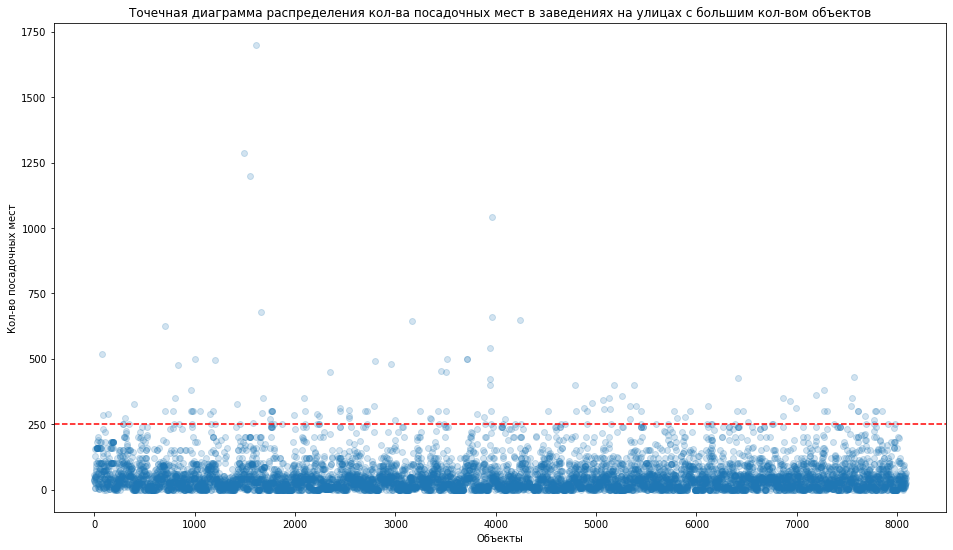

In [55]:
# Построим точечную диаграмму распределения количества посадочных мест
plt.figure(figsize = (16, 9))
x_values = pd.Series(range(0,len(hi_rests)))
plt.scatter(x_values, hi_rests['number'], alpha = 0.2)
plt.axhline(y = 250, color = 'red', linestyle = '--')

plt.title('Точечная диаграмма распределения кол-ва посадочных мест в заведениях на улицах с большим кол-вом объектов')
plt.xlabel('Объекты')
plt.ylabel('Кол-во посадочных мест')
#plt.savefig('plot_8.png', dpi = 100)
plt.show()

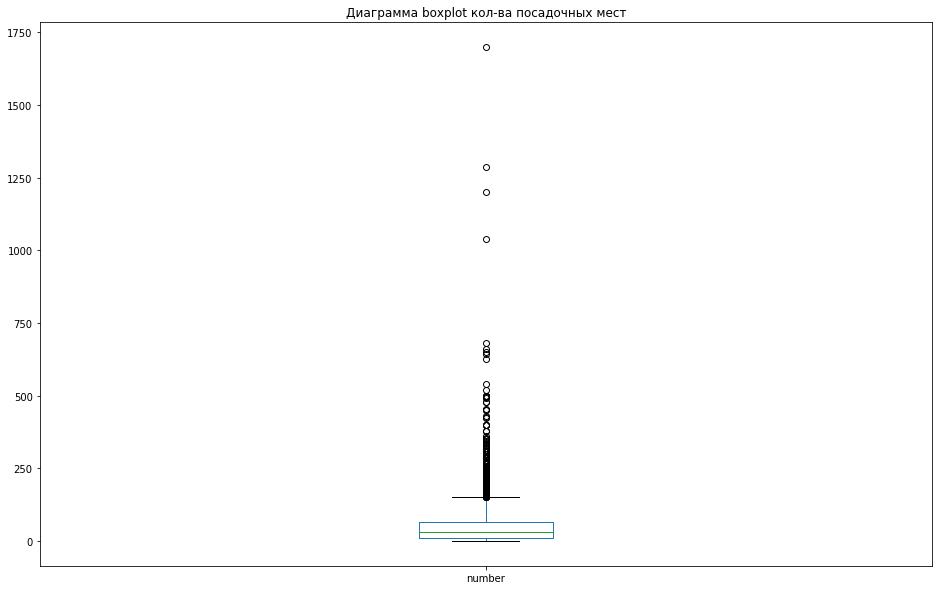

In [56]:
# Посмотрим на боксплот кол-ва посадочных мест
hi_rests['number'].plot(kind = 'box', figsize = (16, 10),
                       title = 'Диаграмма boxplot кол-ва посадочных мест')
plt.show()

In [57]:
# После 300 мест уже можно считать выбросами
good_hi_rests = hi_rests[hi_rests['number'] < 300]

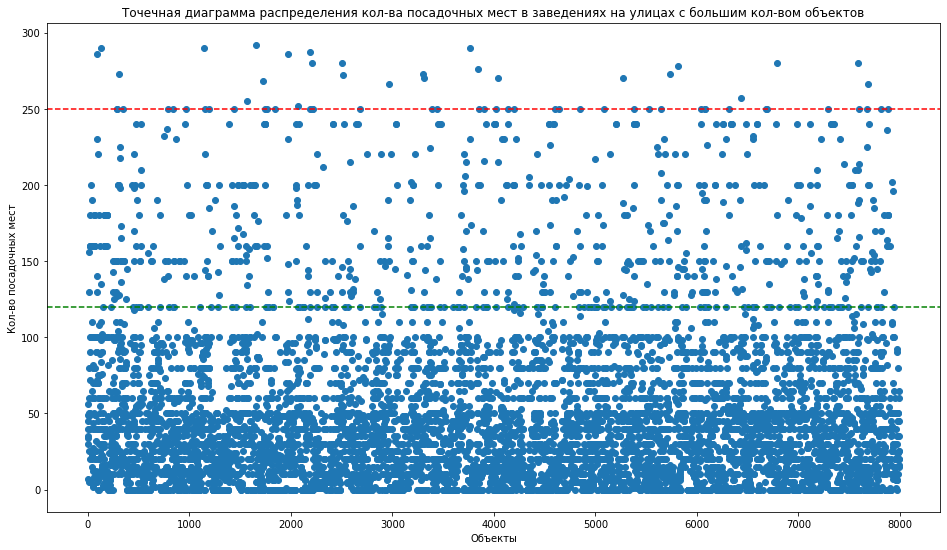

In [58]:
# Построим точечную диаграмму распределения количества заказов на "очищенных" данных
plt.figure(figsize = (16, 9))
x_values = pd.Series(range(0,len(good_hi_rests)))
plt.scatter(x_values, good_hi_rests['number'])
plt.axhline(y = 250, color = 'red', linestyle = '--')
plt.axhline(y = 120, color = 'green', linestyle = '--')

plt.title('Точечная диаграмма распределения кол-ва посадочных мест в заведениях на улицах с большим кол-вом объектов')
plt.xlabel('Объекты')
plt.ylabel('Кол-во посадочных мест')
#plt.savefig('plot_9.png', dpi = 100)
plt.show()

Из графика видно, что 100-120 посадочных мест (25-30 столов) предел для подавляющего большинства заведений.

Есть заведения с числом посадочных мест и больше, однако после 250 их не так много.

Ради интереса можно посмотреть, какие заведения предоставляют более 250 посадочных мест (это примерно 60 столов).

In [59]:
good_hi_rests[good_hi_rests['number'] > 250][['chain', 'object_type', 'number']].sort_values(by = 'object_type',
                                                                                 ascending = False)

,chain,object_type,number
2999,нет,столовая,266
135,нет,столовая,290
7677,нет,столовая,280
1156,нет,столовая,290
1675,нет,столовая,292
1751,нет,столовая,268
1993,нет,столовая,286
5809,нет,столовая,273
5342,нет,столовая,270
4097,нет,столовая,270


Большим количеством посадочных мест славятся столовые и рестораны и в основном не сетевые.

Полагаю, что современный формат заведения предполагает количество посадочных мест не более 100-120 мест.

## <a id="results">3. Общие выводы и рекомендации</a>

1. Наиболее популярными являются следующие типы объектов общественного питания:
    - кафе (6099 / 39.69%)
    - столовая (2587 / 16.84%)
    - ресторан (2285 / 14.87%)
    - предприятие быстрого обслуживания (1923 / 12.51%)
В сумме эти четыре категории занимают около 84% рынка объектов общественного питания. С большим отрывом (более чем в 2 раза) лидирует кафе, затем плотной группой идут остальные три популярные категории: столовая, ресторан, предприятие быстрого обслуживания.


2. Подавляющее преимущество несетевых заведений над сетевыми.
    - Несетевых: 12398 / 80.68%
    - Сетевых: 2968 / 19.32%


3. Сетевое распространение характерно для 3-х видов заведений:
    - кафе
    - предприятие быстрого обслуживания (фастфуд)
    - ресторан
Для остальных видов объектов общественного питания доля сетевых объектов незначительна.


4. Однозначно ответить на вопрос "что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?" сложно.
Закономерности или связи между количеством заведений и средним количеством посадочных мест не выявлено.
В топ-20 по количеству сетевых заведений есть и с большим кол-вом посадочных мест (больше 100), есть средние (от 40 до 100) и есть даже с 0 количеством посадочных мест - кофейни на вынос.


5. Самое большое количество посадочных мест предоставляют столовые (в среднем 130 мест), на втором месте рестораны (в среднем 96 мест).


6. Наибольшее количество объектов общественного питания находятся на самых протяженных улицах в Москве.
Правильнее было бы определять плотность - количество заведений на километр улицы. По данному показателю лидировали бы другие улицы, находящиеся в центре города, например район Патриарших прудов. Также важно наличие на улицах для расположения объектов станций метро и крупных торговых центров.


7. Улиц с одним объектом общественного питания обнаружено более 500.
Они находятся вдали от станций метро и крупных улиц и магистралей и торговых центров, рядом с промзонами
Возьмем ради примера несколько объектов и посмотрим в каких районах они находятся. В целом можно сказать, что выгодное место для размещения точки общественного питания - это пешеходная и транспортная доступность, хорошая проходимость, близость к станциям метро, торговым и бизнес-центрам.


8. Из графика видно, что 100-120 посадочных мест (25-30 столов) предел для подавляющего большинства заведений.
Есть заведения с числом посадочных мест и больше, однако после 250 их не так много. В основном это старые столовые и рестораны. Полагаю, что современный формат заведения предполагает количество посадочных мест не более 100-120 мест.

### Рекомендации

Наши исходные данные содержат лишь информацию о расположении объектов общественного питания и некоторых их характеристики, такие как количество посадочных мест и принадлежность к сети.

Данных, на основании которых можно было бы построить финансовую модель и спрогнозировать финансовый результат, таких как кол-во посетителей в день, средний чек, выручка в месяц, стоимость аренды помещения у нас в наличии нет.

Что касается фишки открываемого кафе, где вместо официантов посетителей обслуживают роботы. На мой взгляд, данная идея расчитана на эффекте сюрприза, привлечет много первых посетителей. Вернутся ли клиенты во второй раз - это большой вопрос, так как повторного сюрприза не будет и привлекать повторных посетителей надо чем-то другим, например выдающейся кухней.

Кроме того, надо учитывать и сезонный фактор. Зимой кафе может быть менее интересно, например из-за снижения туристического потока или отсутсвия посетителей из-за плохой погоды.

Также могут повлиять и внешние факторы, например меры ограничения в связи с пандемией COVID-19 весной 2020 года отразились на снижении интереса к кафе (по данным wordstat.yandex.ru снижение количества поисковых запросов к концу апреля составило 50%)

<b>Рекомендации исходя из проанализированных данных:</b>
- Открывать небольшое несетевое кафе можно и с небольшим количеством посадочных мест - около 40 (10 столов)
- Улица, где открывается наше кафе должна быть очень проходимой, вблизи станции метро и крупного торгового центра
- Избегать спальных и отдаленных районов с плохой транспортной доступностью, а также промзон.

Ссылка на презентацию для инвесторов, подготовленную по итогам исследования

<a id="link">Презентация:</a> <https://yadi.sk/i/G06Y3LLhsVewxg>

[В начало](#start)